<a href="https://www.kaggle.com/code/asanthitejeswararao/speech-emotion-recognition-with-cnn?scriptVersionId=140767863" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Speech Emotion Recognition With Convolutional Neural Network

<a id="1"></a>
# Including Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import librosa
import librosa.display
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import IPython
import tensorflow.keras.layers as L
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler
import re
import itertools
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
print("done")

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


done


<a id="2"></a>
# Including the Datasets

In [2]:
Crema_Path='../input/speech-emotion-recognition-en/Crema/'
Ravdess_Path='../input/speech-emotion-recognition-en/Ravdess/audio_speech_actors_01-24'
Savee_Path='../input/speech-emotion-recognition-en/Savee/'
Tess_Path='../input/speech-emotion-recognition-en/Tess/'
print("done")

done


<a id="3"></a>
# Data Analyze

In [3]:
crema=[]
for wav in os.listdir(Crema_Path):
    emotion=wav.partition(".wav")[0].split('_')
    if emotion[2]=='SAD':
        crema.append(('sad',Crema_Path+'/'+wav))
    elif emotion[2]=='ANG':
        crema.append(('angry',Crema_Path+'/'+wav))
    elif emotion[2]=='DIS':
        crema.append(('disgust',Crema_Path+'/'+wav))
    elif emotion[2]=='FEA':
        crema.append(('fear',Crema_Path+'/'+wav))
    elif emotion[2]=='HAP':
        crema.append(('happy',Crema_Path+'/'+wav))
    elif emotion[2]=='NEU':
        crema.append(('neutral',Crema_Path+'/'+wav))
    else:
        crema.append(('unknown',Crema_Path+'/'+wav))
Crema_df=pd.DataFrame.from_dict(crema)
Crema_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Crema_df.head()

Emotion                                          File_Path
0  disgust  ../input/speech-emotion-recognition-en/Crema//...
1    happy  ../input/speech-emotion-recognition-en/Crema//...
2    happy  ../input/speech-emotion-recognition-en/Crema//...
3  disgust  ../input/speech-emotion-recognition-en/Crema//...
4  disgust  ../input/speech-emotion-recognition-en/Crema//...

In [4]:
Crema_df['Emotion'].unique()

array(['disgust', 'happy', 'sad', 'neutral', 'fear', 'angry'],
      dtype=object)

In [5]:
ravdess=[]
for directory in os.listdir(Ravdess_Path):
    actors=os.listdir(os.path.join(Ravdess_Path,directory))
    for wav in actors:
        emotion=wav.partition('.wav')[0].split('-')
        emotion_number=int(emotion[2])
        ravdess.append((emotion_number,os.path.join(Ravdess_Path,directory,wav)))
Ravdess_df=pd.DataFrame.from_dict(ravdess)
Ravdess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Ravdess_df['Emotion'].replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'},inplace=True)
Ravdess_df.head()

Emotion                                          File_Path
0  surprise  ../input/speech-emotion-recognition-en/Ravdess...
1   neutral  ../input/speech-emotion-recognition-en/Ravdess...
2   disgust  ../input/speech-emotion-recognition-en/Ravdess...
3   disgust  ../input/speech-emotion-recognition-en/Ravdess...
4   neutral  ../input/speech-emotion-recognition-en/Ravdess...

In [6]:
Ravdess_df['Emotion'].unique()

array(['surprise', 'neutral', 'disgust', 'fear', 'sad', 'happy', 'angry'],
      dtype=object)

In [7]:
savee=[]
for wav in os.listdir(Savee_Path):
    emo=wav.partition('.wav')[0].split('_')[1].replace(r'[0-9]','')
    emotion=re.split(r'[0-9]',emo)[0]
    if emotion=='a':
        savee.append(('angry',Savee_Path+'/'+wav))
    elif emotion=='d':
        savee.append(('disgust',Savee_Path+'/'+wav))
    elif emotion=='f':
        savee.append(('fear',Savee_Path+'/'+wav))
    elif emotion=='h':
        savee.append(('happy',Savee_Path+'/'+wav))
    elif emotion=='n':
        savee.append(('neutral',Savee_Path+'/'+wav))
    elif emotion=='sa':
        savee.append(('sad',Savee_Path+'/'+wav))
    elif emotion=='su':
        savee.append(('surprise',Savee_Path+'/'+wav))
Savee_df=pd.DataFrame.from_dict(savee)
Savee_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Savee_df.head()

Emotion                                          File_Path
0    happy  ../input/speech-emotion-recognition-en/Savee//...
1     fear  ../input/speech-emotion-recognition-en/Savee//...
2    happy  ../input/speech-emotion-recognition-en/Savee//...
3  disgust  ../input/speech-emotion-recognition-en/Savee//...
4    angry  ../input/speech-emotion-recognition-en/Savee//...

In [8]:
Savee_df['Emotion'].unique()

array(['happy', 'fear', 'disgust', 'angry', 'surprise', 'neutral', 'sad'],
      dtype=object)

In [9]:
tess=[]
for directory in os.listdir(Tess_Path):
    for wav in os.listdir(os.path.join(Tess_Path,directory)):
        emotion=wav.partition('.wav')[0].split('_')
        if emotion[2]=='ps':
            tess.append(('surprise',os.path.join(Tess_Path,directory,wav)))
        else:
            tess.append((emotion[2],os.path.join(Tess_Path,directory,wav)))
Tess_df=pd.DataFrame.from_dict(tess)
Tess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Tess_df.head()

Emotion                                          File_Path
0    fear  ../input/speech-emotion-recognition-en/Tess/YA...
1    fear  ../input/speech-emotion-recognition-en/Tess/YA...
2    fear  ../input/speech-emotion-recognition-en/Tess/YA...
3    fear  ../input/speech-emotion-recognition-en/Tess/YA...
4    fear  ../input/speech-emotion-recognition-en/Tess/YA...

In [10]:
Tess_df['Emotion'].unique()

array(['fear', 'angry', 'disgust', 'neutral', 'sad', 'surprise', 'happy'],
      dtype=object)

In [11]:
main_df=Ravdess_df.copy()
main_df.shape

(1440, 2)

In [12]:
main_df.head(15)

Emotion                                          File_Path
0   surprise  ../input/speech-emotion-recognition-en/Ravdess...
1    neutral  ../input/speech-emotion-recognition-en/Ravdess...
2    disgust  ../input/speech-emotion-recognition-en/Ravdess...
3    disgust  ../input/speech-emotion-recognition-en/Ravdess...
4    neutral  ../input/speech-emotion-recognition-en/Ravdess...
5       fear  ../input/speech-emotion-recognition-en/Ravdess...
6        sad  ../input/speech-emotion-recognition-en/Ravdess...
7    neutral  ../input/speech-emotion-recognition-en/Ravdess...
8    neutral  ../input/speech-emotion-recognition-en/Ravdess...
9      happy  ../input/speech-emotion-recognition-en/Ravdess...
10   disgust  ../input/speech-emotion-recognition-en/Ravdess...
11     angry  ../input/speech-emotion-recognition-en/Ravdess...
12     happy  ../input/speech-emotion-recognition-en/Ravdess...
13      fear  ../input/speech-emotion-recognition-en/Ravdess...
14  surprise  ../input/speech-emotion-recognition-en/Ravdess...

In [13]:
main_df.tail(15)

Emotion                                          File_Path
1425     angry  ../input/speech-emotion-recognition-en/Ravdess...
1426     angry  ../input/speech-emotion-recognition-en/Ravdess...
1427   neutral  ../input/speech-emotion-recognition-en/Ravdess...
1428   disgust  ../input/speech-emotion-recognition-en/Ravdess...
1429  surprise  ../input/speech-emotion-recognition-en/Ravdess...
1430   disgust  ../input/speech-emotion-recognition-en/Ravdess...
1431      fear  ../input/speech-emotion-recognition-en/Ravdess...
1432     happy  ../input/speech-emotion-recognition-en/Ravdess...
1433   neutral  ../input/speech-emotion-recognition-en/Ravdess...
1434      fear  ../input/speech-emotion-recognition-en/Ravdess...
1435      fear  ../input/speech-emotion-recognition-en/Ravdess...
1436     angry  ../input/speech-emotion-recognition-en/Ravdess...
1437       sad  ../input/speech-emotion-recognition-en/Ravdess...
1438   disgust  ../input/speech-emotion-recognition-en/Ravdess...
1439     angry  ../input/speech-emotion-recognition-en/Ravdess...

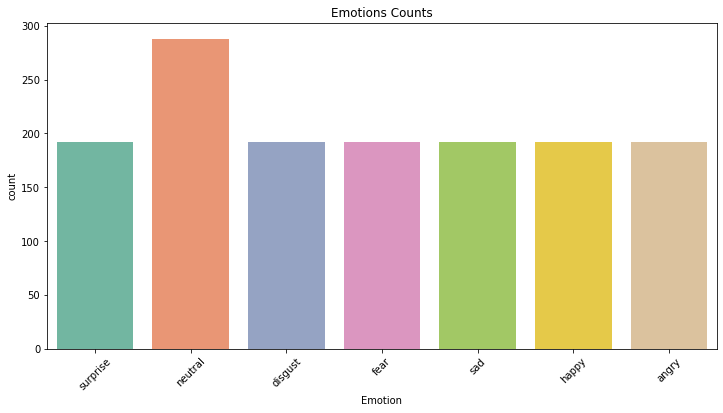

In [14]:
plt.figure(figsize=(12,6))
plt.title('Emotions Counts')
emotions=sns.countplot(x='Emotion',data=main_df,palette='Set2')
emotions.set_xticklabels(emotions.get_xticklabels(),rotation=45)
plt.show()

In [15]:
emotion_names=main_df['Emotion'].unique()
emotion_names

array(['surprise', 'neutral', 'disgust', 'fear', 'sad', 'happy', 'angry'],
      dtype=object)

In [16]:
print("done")
colors={'disgust':'#804E2D','happy':'#F19C0E','sad':'#478FB8','neutral':'#4CB847','fear':'#7D55AA','angry':'#C00808','surprise':'#EE00FF'}

done


In [17]:
def wave_plot(data,sr,emotion,color):
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for waveplot',size=17)
    librosa.display.waveshow(y=data,sr=sr,color=color)

In [18]:
def spectogram(data,sr,emotion):
    audio=librosa.stft(data)
    audio_db=librosa.amplitude_to_db(abs(audio))
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for spectogram',size=17)
    librosa.display.specshow(audio_db,sr=sr,x_axis='time',y_axis='hz')
print("done")

done


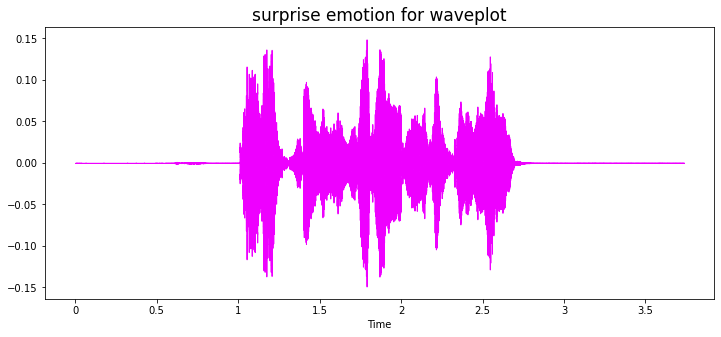

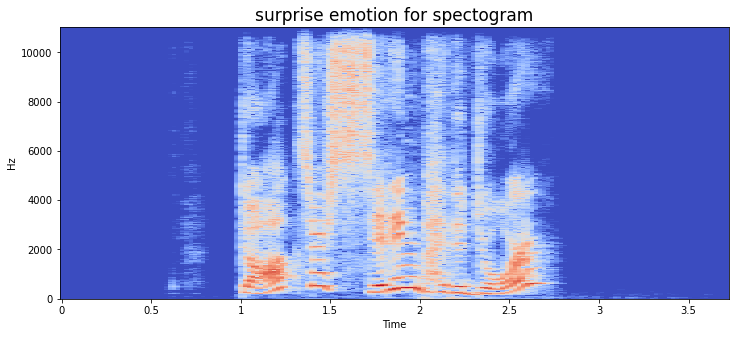

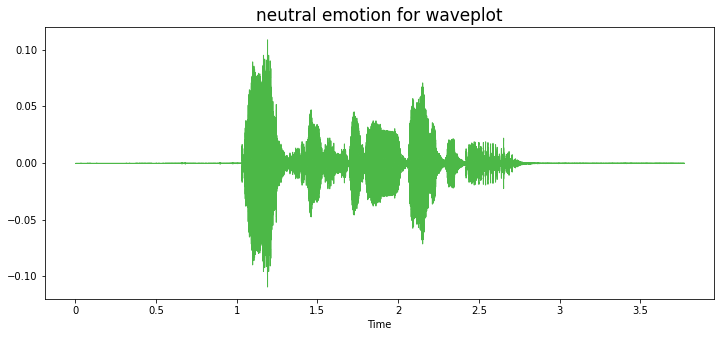

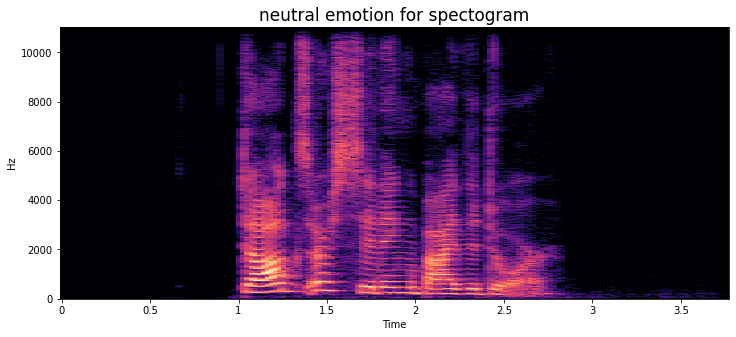

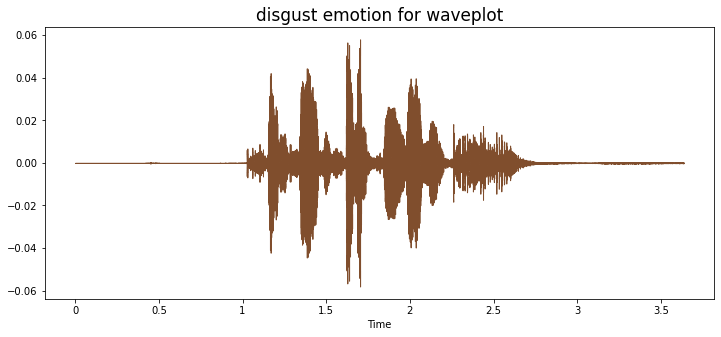

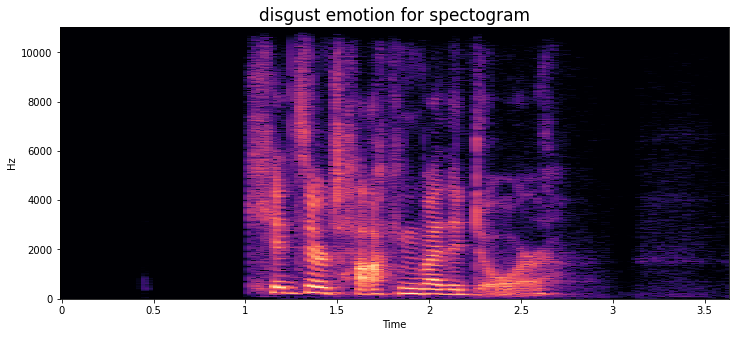

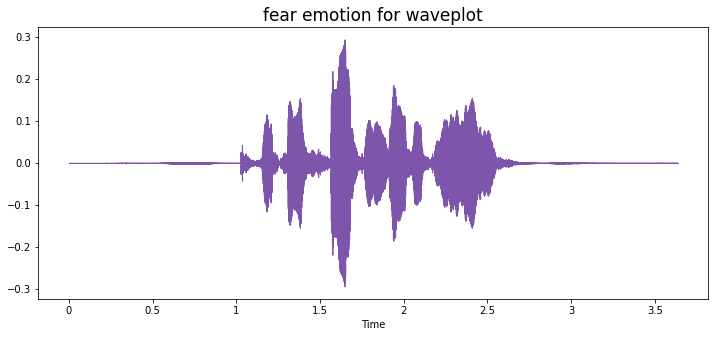

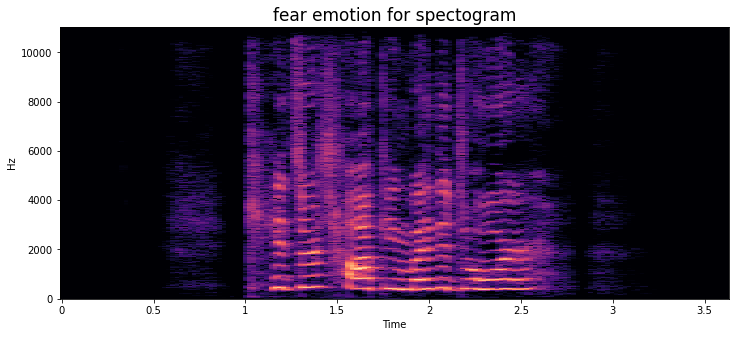

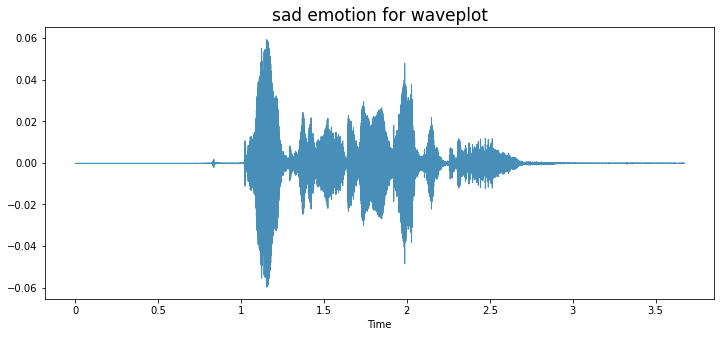

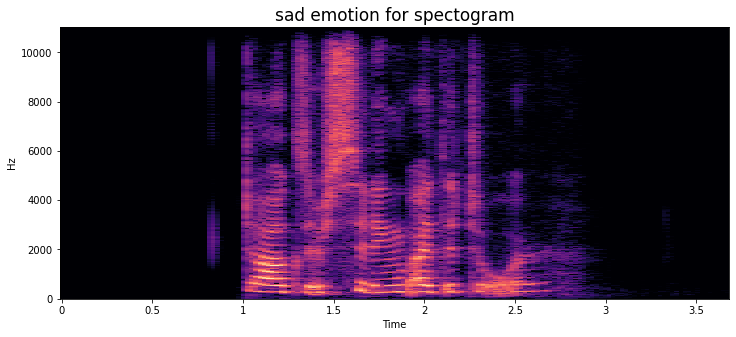

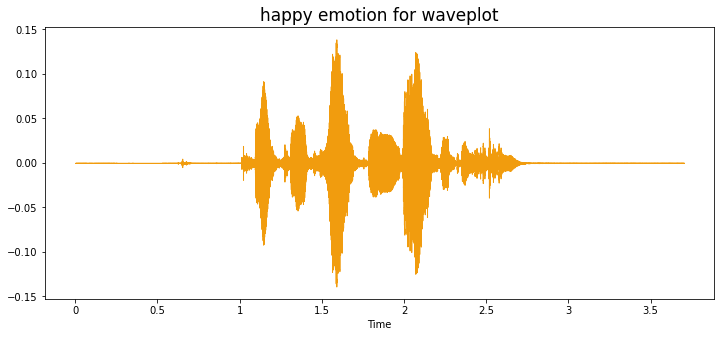

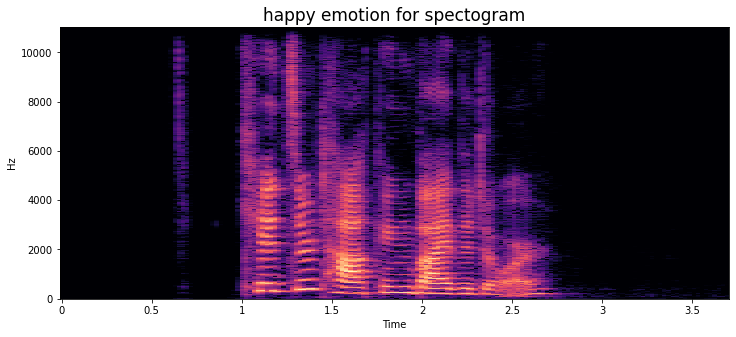

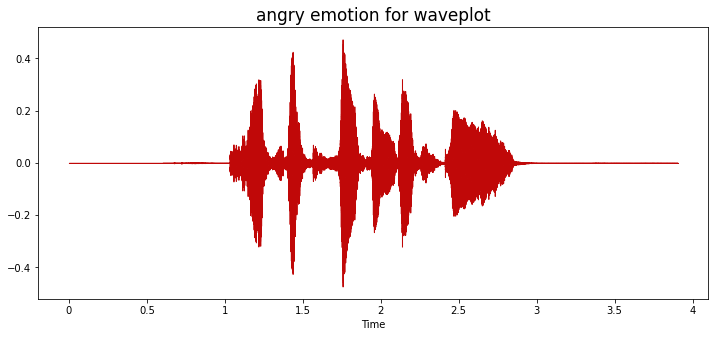

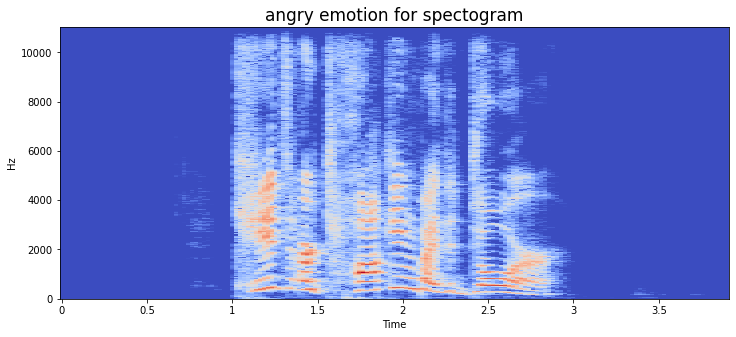

In [19]:
audio_path=[]
for emotion in emotion_names:
    path=np.array(main_df['File_Path'][main_df['Emotion']==emotion])[1]
    data,sr=librosa.load(path)
    wave_plot(data,sr,emotion,colors[emotion])
    spectogram(data,sr,emotion)
    audio_path.append(path)

In [20]:
print('Suprise Audio Sample\n')
IPython.display.Audio(audio_path[0])

Suprise Audio Sample



In [21]:
print('Neutral Audio Sample\n')
IPython.display.Audio(audio_path[1])

Neutral Audio Sample



In [22]:
print('Disgust Audio Sample\n')
IPython.display.Audio(audio_path[2])

Disgust Audio Sample



In [23]:
print('Fear Audio Sample\n')
IPython.display.Audio(audio_path[3])

Fear Audio Sample



In [24]:
print('Sad Audio Sample\n')
IPython.display.Audio(audio_path[4])

Sad Audio Sample



In [25]:
print('Happy Audio Sample\n')
IPython.display.Audio(audio_path[5])

Happy Audio Sample



In [26]:
print('Angry Audio Sample\n')
IPython.display.Audio(audio_path[6])

Angry Audio Sample



<a id="7"></a>
## Audio Augmentation

In [27]:
data,sr=librosa.load(audio_path[6])

<a id="13"></a>
## Feature Extraction

In [28]:
def zcr(data,frame_length=2048,hop_length=512):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result



In [29]:
X,Y=[],[]
for path,emotion,index in zip(main_df.File_Path,main_df.Emotion,range(main_df.File_Path.shape[0])):
    data,sr=librosa.load(path,duration=2.5,offset=0.6)
    aud=extract_features(data,sr)
#     print(features)
    if index%500==0:
        print(f'{index} audio has been processed')
#     for i in aud:
    X.append(aud)
    Y.append(emotion)
print('Done')

0 audio has been processed
500 audio has been processed
1000 audio has been processed
Done


In [30]:
len(X[0])

2376

<a id="14"></a>
## Processing

In [31]:
len(X)

1440

In [32]:
processed_data_path='./processed_data.csv'

In [33]:
extract=pd.DataFrame(X)
extract['Emotion']=Y
extract.to_csv(processed_data_path,index=False)
extract.head(10)

0         1         2         3         4         5         6  \
0  0.342285  0.479492  0.573730  0.458008  0.376465  0.301758  0.269043   
1  0.420898  0.631348  0.833008  0.837891  0.831055  0.821777  0.819824   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.049805  0.121094   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.354004  0.478516  0.639648  0.672852  0.707520  0.735840  0.752930   
5  0.119629  0.187012  0.251953  0.265625  0.273438  0.272949  0.273926   
6  0.000000  0.000000  0.000000  0.006836  0.217285  0.390137  0.556641   
7  0.217773  0.365723  0.567383  0.609375  0.703125  0.704102  0.628418   
8  0.000000  0.000000  0.000000  0.000000  0.065918  0.163086  0.192871   
9  0.224609  0.345215  0.449219  0.447266  0.458984  0.468750  0.557617   

          7         8         9  ...      2367       2368       2369  \
0  0.256348  0.252441  0.252930  ... -1.517676  -1.716490  -1.599320   
1  0.810059  0.804688  0.627930  ...  2.586154   2.746669   2.223158   
2  0.121094  0.168945  0.277344  ... -1.638911 -24.317047  18.334091   
3  0.000000  0.000000  0.000000  ...  0.489772  -0.308767  -1.204156   
4  0.688965  0.637207  0.684570  ...  2.532871   2.228963   1.982028   
5  0.268555  0.267090  0.270508  ... -0.161101   0.724263   0.825022   
6  0.701172  0.635742  0.462891  ...  0.268738   0.026865  -0.117646   
7  0.586426  0.579590  0.620605  ...  2.144778   2.161176   2.049413   
8  0.210938  0.144531  0.047852  ... -5.299430   7.143999   5.238457   
9  0.654297  0.744141  0.767578  ... -0.055552   0.064408   0.238269   

        2370       2371       2372      2373      2374      2375   Emotion  
0  -1.234629  -0.693210  -0.038948  0.675251  1.405677  2.112398  surprise  
1   0.986811  -0.730842  -2.531069 -4.002949 -4.849368 -4.929605   neutral  
2 -15.233925  -7.496490 -14.094938 -5.390067 -7.527329  0.159934   disgust  
3  -1.968321  -2.424066  -2.513093 -2.415897 -2.385482 -2.398899   disgust  
4   1.749756   1.501787   1.218191  0.887121  0.504073  0.073025   neutral  
5   0.295479   0.199586   0.480847  0.285877 -0.309189 -0.536636      fear  
6  -0.206778  -0.270463  -0.314123 -0.324637 -0.288699 -0.208720       sad  
7   1.826430   1.573014   1.304073  0.947716  0.451007 -0.110089   neutral  
8  -8.428155 -18.541983 -11.884494  3.401798  3.232715 -6.495242   neutral  
9   0.419664   0.562348   0.626569  0.584405  0.423608  0.149098     happy  

[10 rows x 2377 columns]

<a id="15"></a>
# Including Analyzed Audio Features

In [34]:
df=pd.read_csv(processed_data_path)
df.shape

(1440, 2377)

In [35]:
df=df.fillna(0)
print(df.isna().any())
df.shape

0          False
1          False
2          False
3          False
4          False
           ...  
2372       False
2373       False
2374       False
2375       False
Emotion    False
Length: 2377, dtype: bool


(1440, 2377)

In [36]:
df.head(10)

0         1         2         3         4         5         6  \
0  0.342285  0.479492  0.573730  0.458008  0.376465  0.301758  0.269043   
1  0.420898  0.631348  0.833008  0.837891  0.831055  0.821777  0.819824   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.049805  0.121094   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.354004  0.478516  0.639648  0.672852  0.707520  0.735840  0.752930   
5  0.119629  0.187012  0.251953  0.265625  0.273438  0.272949  0.273926   
6  0.000000  0.000000  0.000000  0.006836  0.217285  0.390137  0.556641   
7  0.217773  0.365723  0.567383  0.609375  0.703125  0.704102  0.628418   
8  0.000000  0.000000  0.000000  0.000000  0.065918  0.163086  0.192871   
9  0.224609  0.345215  0.449219  0.447266  0.458984  0.468750  0.557617   

          7         8         9  ...      2367       2368       2369  \
0  0.256348  0.252441  0.252930  ... -1.517676  -1.716490  -1.599320   
1  0.810059  0.804688  0.627930  ...  2.586154   2.746669   2.223158   
2  0.121094  0.168945  0.277344  ... -1.638911 -24.317047  18.334091   
3  0.000000  0.000000  0.000000  ...  0.489772  -0.308767  -1.204156   
4  0.688965  0.637207  0.684570  ...  2.532871   2.228963   1.982028   
5  0.268555  0.267090  0.270508  ... -0.161101   0.724263   0.825022   
6  0.701172  0.635742  0.462891  ...  0.268738   0.026865  -0.117646   
7  0.586426  0.579590  0.620605  ...  2.144778   2.161176   2.049413   
8  0.210938  0.144531  0.047852  ... -5.299430   7.143999   5.238457   
9  0.654297  0.744141  0.767578  ... -0.055552   0.064408   0.238269   

        2370       2371       2372      2373      2374      2375   Emotion  
0  -1.234629  -0.693210  -0.038948  0.675251  1.405677  2.112398  surprise  
1   0.986811  -0.730842  -2.531069 -4.002949 -4.849368 -4.929605   neutral  
2 -15.233925  -7.496490 -14.094938 -5.390067 -7.527329  0.159934   disgust  
3  -1.968321  -2.424066  -2.513093 -2.415897 -2.385482 -2.398899   disgust  
4   1.749756   1.501787   1.218191  0.887121  0.504073  0.073025   neutral  
5   0.295479   0.199586   0.480847  0.285877 -0.309189 -0.536636      fear  
6  -0.206778  -0.270463  -0.314123 -0.324637 -0.288699 -0.208720       sad  
7   1.826430   1.573014   1.304073  0.947716  0.451007 -0.110089   neutral  
8  -8.428155 -18.541983 -11.884494  3.401798  3.232715 -6.495242   neutral  
9   0.419664   0.562348   0.626569  0.584405  0.423608  0.149098     happy  

[10 rows x 2377 columns]

<a id="16"></a>
# Processing Analyzed Data for Training

In [37]:
X=df.drop(labels='Emotion',axis=1)
Y=df['Emotion']

In [38]:
lb=LabelEncoder()
Y=np_utils.to_categorical(lb.fit_transform(Y))
print(lb.classes_)

['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


<a id="17"></a>
## Train, Test and Validation Spliting

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2,shuffle=True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1152, 2376), (288, 2376), (1152, 7), (288, 7))

In [40]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,random_state=42,test_size=0.1,shuffle=True)
X_train.shape, X_test.shape, X_val.shape, y_train.shape,y_test.shape,y_val.shape

((1036, 2376), (288, 2376), (116, 2376), (1036, 7), (288, 7), (116, 7))

In [41]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_val=scaler.transform(X_val)
X_train.shape,X_test.shape,X_val.shape,y_train.shape,y_test.shape,y_val.shape

((1036, 2376), (288, 2376), (116, 2376), (1036, 7), (288, 7), (116, 7))

In [42]:
X_train=np.expand_dims(X_train,axis=2)
X_val=np.expand_dims(X_val,axis=2)
X_test=np.expand_dims(X_test,axis=2)
X_train.shape, X_test.shape, X_val.shape

((1036, 2376, 1), (288, 2376, 1), (116, 2376, 1))

<a id="18"></a>
## Tuning for Training

In [43]:
early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [44]:
EPOCH=50
BATCH_SIZE=64

<a id="19"></a>
# Begin Training

In [45]:
model=tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(7,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2376, 512)         3072      
_________________________________________________________________
batch_normalization (BatchNo (None, 2376, 512)         2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1188, 512)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1188, 512)         1311232   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1188, 512)         2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 594, 512)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 594, 256)          6

In [46]:
history=model.fit(X_train, y_train, epochs=EPOCH, validation_data=(X_val,y_val), batch_size=BATCH_SIZE,callbacks=[early_stop,lr_reduction])

Epoch 1/50
17/17 [==============================] - 238s 14s/step - loss: 2.4296 - accuracy: 0.3591 - val_loss: 3.1882 - val_accuracy: 0.1983
Epoch 2/50
17/17 [==============================] - 233s 14s/step - loss: 1.0982 - accuracy: 0.5936 - val_loss: 4.7934 - val_accuracy: 0.1638
Epoch 3/50
17/17 [==============================] - 234s 14s/step - loss: 0.7461 - accuracy: 0.7403 - val_loss: 5.7475 - val_accuracy: 0.1207
Epoch 4/50
17/17 [==============================] - 235s 14s/step - loss: 0.5553 - accuracy: 0.8214 - val_loss: 6.1466 - val_accuracy: 0.1034
Epoch 5/50
17/17 [==============================] - 240s 14s/step - loss: 0.4714 - accuracy: 0.8514 - val_loss: 5.7483 - val_accuracy: 0.1034
Epoch 6/50
17/17 [==============================] - 233s 14s/step - loss: 0.2775 - accuracy: 0.9266 - val_loss: 8.0505 - val_accuracy: 0.1034
Epoch 7/50
17/17 [==============================] - 232s 14s/step - loss: 0.1530 - accuracy: 0.9643 - val_loss: 8.0479 - val_accuracy: 0.1034
Epoch 

<a id="20"></a>
# Drawing Charts

<a id="21"></a>
## Accuracy Charts

In [47]:
fig=px.line(history.history,y=['accuracy','val_accuracy'],
           labels={'index':'epoch','value':'accuracy'},
           title=f'According to the epoch --accuracy and validation accuracy chart for the model')
fig.show()

<a id="22"></a>
## Loss Charts

In [48]:
fig=px.line(history.history,y=['loss','val_loss'],
           labels={'index':'epoch','value':'loss'},
           title=f'According to the epoch loss and validation loss chart for the model')
fig.show()

<a id="24"></a>
# Testing Model and Test Results

In [49]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([3, 6, 2, 4, 3, 1, 6, 6, 0, 6, 1, 6, 1, 4, 5, 6, 4, 1, 3, 4, 0, 4,
       4, 4, 0, 3, 4, 4, 5, 5, 2, 4, 6, 2, 3, 6, 4, 1, 0, 1, 4, 6, 2, 3,
       0, 2, 4, 4, 4, 6, 4, 2, 1, 6, 3, 2, 4, 5, 2, 2, 6, 4, 2, 0, 1, 2,
       6, 4, 0, 1, 1, 4, 4, 2, 1, 2, 1, 4, 1, 2, 6, 6, 0, 5, 4, 0, 2, 1,
       2, 1, 5, 2, 2, 3, 1, 4, 6, 0, 6, 4, 5, 6, 6, 1, 4, 5, 3, 4, 4, 4,
       6, 4, 2, 4, 4, 1, 5, 0, 5, 1, 4, 0, 6, 4, 6, 6, 6, 4, 0, 1, 3, 1,
       2, 6, 5, 1, 4, 2, 1, 2, 2, 2, 1, 2, 4, 4, 5, 6, 6, 4, 0, 5, 2, 2,
       4, 4, 1, 0, 6, 0, 1, 3, 4, 2, 2, 4, 0, 0, 6, 4, 0, 2, 2, 1, 1, 4,
       2, 5, 4, 4, 1, 6, 6, 4, 4, 4, 4, 4, 0, 6, 6, 6, 1, 4, 4, 0, 0, 6,
       6, 4, 2, 4, 6, 0, 0, 6, 0, 0, 0, 1, 4, 4, 3, 5, 0, 4, 0, 4, 4, 3,
       4, 4, 1, 0, 3, 2, 2, 6, 3, 0, 1, 4, 5, 5, 2, 2, 0, 1, 1, 6, 2, 4,
       4, 2, 6, 4, 5, 0, 2, 0, 0, 4, 1, 1, 2, 6, 1, 3, 6, 4, 0, 0, 2, 6,
       2, 1, 6, 4, 6, 6, 1, 0, 5, 6, 4, 4, 2, 3, 0, 4, 4, 0, 6, 2, 4, 0,
       3, 4])

In [50]:
y_check=np.argmax(y_test,axis=1)
y_check

array([3, 6, 2, 4, 3, 1, 6, 1, 1, 6, 3, 6, 1, 3, 4, 1, 4, 1, 3, 4, 0, 4,
       4, 5, 0, 3, 1, 5, 5, 5, 3, 4, 0, 3, 0, 6, 4, 5, 0, 4, 6, 5, 3, 3,
       0, 3, 4, 4, 4, 6, 6, 3, 1, 3, 3, 2, 3, 1, 5, 2, 0, 5, 6, 3, 1, 2,
       5, 4, 1, 4, 2, 4, 3, 2, 2, 2, 1, 4, 6, 2, 3, 6, 1, 5, 1, 1, 2, 1,
       2, 2, 4, 2, 5, 1, 2, 3, 6, 0, 6, 4, 5, 1, 1, 6, 0, 5, 3, 4, 4, 5,
       3, 5, 2, 4, 4, 2, 1, 0, 1, 1, 4, 0, 6, 1, 3, 5, 6, 1, 2, 1, 3, 1,
       2, 2, 1, 1, 5, 5, 1, 4, 2, 6, 1, 2, 4, 4, 5, 6, 6, 0, 0, 3, 3, 5,
       5, 4, 1, 0, 0, 6, 1, 6, 4, 2, 6, 4, 0, 0, 6, 4, 6, 0, 3, 5, 1, 4,
       6, 5, 4, 4, 1, 2, 5, 4, 5, 4, 0, 4, 0, 2, 6, 6, 4, 2, 4, 0, 0, 2,
       1, 4, 6, 1, 6, 0, 3, 6, 3, 3, 0, 5, 4, 4, 3, 4, 0, 4, 3, 5, 4, 3,
       4, 4, 1, 0, 3, 0, 0, 6, 5, 3, 6, 4, 4, 5, 3, 5, 1, 1, 0, 3, 5, 4,
       4, 2, 6, 4, 5, 0, 6, 0, 6, 4, 3, 1, 6, 3, 1, 1, 4, 4, 0, 6, 1, 5,
       3, 5, 6, 4, 6, 6, 2, 1, 2, 6, 2, 1, 6, 3, 2, 4, 5, 0, 3, 6, 4, 0,
       4, 4])

In [51]:
loss,accuracy=model.evaluate(X_test,y_test,verbose=0)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Test Loss: 2.2367286682128906
Test Accuracy: 0.5347222089767456


<a id="25"></a>
## Confusion Matrix

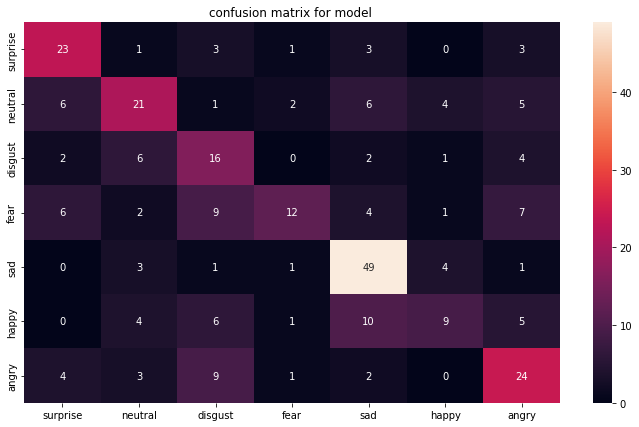

In [52]:
conf=confusion_matrix(y_check,y_pred)
cm=pd.DataFrame(
    conf,index=[i for i in emotion_names],
    columns=[i for i in emotion_names]
)
plt.figure(figsize=(12,7))
ax=sns.heatmap(cm,annot=True,fmt='d')
ax.set_title(f'confusion matrix for model ')
plt.show()

In [53]:
print(f'Model Confusion Matrix\n',classification_report(y_check,y_pred,target_names=emotion_names))

Model Confusion Matrix
               precision    recall  f1-score   support

    surprise       0.56      0.68      0.61        34
     neutral       0.53      0.47      0.49        45
     disgust       0.36      0.52      0.42        31
        fear       0.67      0.29      0.41        41
         sad       0.64      0.83      0.73        59
       happy       0.47      0.26      0.33        35
       angry       0.49      0.56      0.52        43

    accuracy                           0.53       288
   macro avg       0.53      0.51      0.50       288
weighted avg       0.54      0.53      0.52       288

